### Imports

In [62]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import metrics

from sklearn.preprocessing import scale

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

import cv2

### Reading data

In [63]:
# Read data
mnist_data = pd.read_csv('mnist.csv').values

# Split labels and pixel_data
digit_labels = mnist_data[:, 0]
pixel_data   = mnist_data[:, 1:]

# Determine amont of rows and columns
nr_of_rows_in_data, nr_of_cols_in_data = pixel_data.shape

# Enumerate digits 0..9
digits = np.array(range(10)).astype('int')

### Plot an image from the data

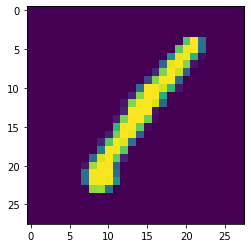

In [64]:
# Plot the image 'image_number' from the data
image_number = 0

img_size = 28

plt.imshow(pixel_data[image_number].reshape(img_size, img_size))
plt.show()

### Ink feature

 Digit         Mean  Standard Deviation
   0.0 34632.407551         8461.892043
   1.0 15188.466268         4409.461697
   2.0 29871.099354         7653.006199
   3.0 28320.188003         7574.104536
   4.0 24232.722495         6374.633457
   5.0 25835.920422         7526.602989
   6.0 27734.917331         7530.503187
   7.0 22931.244263         6168.340878
   8.0 30184.148413         7777.396357
   9.0 24553.750000         6465.231330


<ErrorbarContainer object of 3 artists>

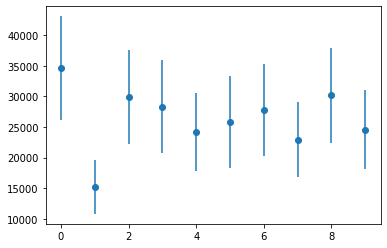

In [65]:
# Determine amount of ink for each image
ink = np.array([sum(image) for image in pixel_data])

# Compute mean and standard deviation for the ink for each digit 
ink_mean = [np.mean(ink[digit_labels == i]) for i in digits]
ink_std  = [np.std(ink[digit_labels == i])  for i in digits]

# Print the mean and standard deviation for each digit in a dataframe
ink_all_values = np.column_stack((digits, ink_mean, ink_std))
ink_dataframe  = pd.DataFrame(data = ink_all_values, columns = ['Digit','Mean', 'Standard Deviation'])

print(ink_dataframe.to_string(index = False))

# Plot the mean and standard deviation for each digit
plt.errorbar(digits, ink_mean, ink_std, linestyle = 'None', marker = 'o')

Low values between 12000 and 18000 (or even lower) likely point to digit '1'

High values above 38000 are most probably the digit '0'

For values inbetween, the amounts of ink are very close

'0'    34632
'1'    15188
'2'    29871
'3'    28230
'4'    24232
'5'    25835
'6'    27734
'7'    22931
'8'    30184
'9'    24553

0 -> 8 -> 2 -> 3 -> 6 -> 5 -> 9 -> 4 -> 7 -> 1

#### Reshape ink data

In [66]:
# Reshape to a single feature for Logistic Regression
ink_reshaped = scale(ink).reshape(-1, 1)

### Logistic Regression (l_1 and l_2 penalty)

In [73]:
# Fit Logistic Regression (l1) model to full data
logistic_regression_model_l1 = LogisticRegression(penalty = 'l1', solver = 'liblinear')
logistic_regression_model_l1.fit(ink_reshaped, digit_labels)

# Get predictions on full data
digit_labels_predictions_l1 = logistic_regression_model_l1.predict(ink_reshaped)

# Print the confusion matrix, accuracy etc.
confusion_matrix_l1 = metrics.confusion_matrix(digit_labels, digit_labels_predictions_l1)
accuracy_l1         = metrics.accuracy_score(digit_labels, digit_labels_predictions_l1)

In [74]:
# Fit Logistic Regression (l2) model to full data
logistic_regression_model_l2 = LogisticRegression(penalty = 'l2', solver = 'liblinear')
logistic_regression_model_l2.fit(ink_reshaped, digit_labels)

# Get predictions on full data
digit_labels_predictions_l2 = logistic_regression_model_l2.predict(ink_reshaped)

# Print the confusion matrix, accuracy etc.
confusion_matrix_l2 = metrics.confusion_matrix(digit_labels, digit_labels_predictions_l2)
accuracy_l2         = metrics.accuracy_score(digit_labels, digit_labels_predictions_l2)

#### Predicting majority class

In [75]:
# Prediction of majority class
majority_class_row_count = np.bincount(digit_labels).max()
majority_class_prediction_accuracy = majority_class_row_count / nr_of_rows_in_data

#### Confusion matrices and accuracies

In [76]:
# Accuracies logistic regression models and for predicting the majority class
print('Accuracy of Predicting Majority Class: ' + str(majority_class_prediction_accuracy))
print('Accuracy of Logistic Regression Model (l1): ' + str(accuracy_l1))
print('Accuracy of Logistic Regression Model (l2): ' + str(accuracy_l2))

# Confusion matrices for the regression models
print(confusion_matrix_l1)
print(confusion_matrix_l2)

[[2609   99   85  873    0    0    0  466    0    0]
 [  13 3970    0  103    0    0    0  598    0    0]
 [1691  344   78 1125    0    0    0  939    0    0]
 [1441  495   91 1118    0    0    0 1206    0    0]
 [ 549  997   34  975    0    0    0 1517    0    0]
 [ 835  785   62  896    0    0    0 1217    0    0]
 [1235  525   71 1068    0    0    0 1238    0    0]
 [ 411 1403   33  887    0    0    0 1667    0    0]
 [1632  259   86 1131    0    0    0  955    0    0]
 [ 589  911   53  954    0    0    0 1681    0    0]]
[[2609   99   85  873    0    0    0  466    0    0]
 [  13 3974    0  103    0    0    0  594    0    0]
 [1691  345   78 1125    0    0    0  938    0    0]
 [1441  498   90 1119    0    0    0 1203    0    0]
 [ 549  998   34  975    0    0    0 1516    0    0]
 [ 835  785   62  896    0    0    0 1217    0    0]
 [1236  527   70 1067    0    0    0 1237    0    0]
 [ 411 1411   33  887    0    0    0 1659    0    0]
 [1634  259   84 1131    0    0    0  955    